# Exploratory Data Analysis (EDA)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df = pd.read_excel("Lung cancer data.xlsx")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NaN,2,2,1,1,2,1,2,2,NaN,2,2,2,YES
1,M,74,NaN,1,1,1,2,2,2,1,1,NaN,2,2,2,YES
2,F,59,1.0,1,1,2,1,2,1,2,1,2.0,2,1,2,NO
3,M,63,2.0,2,2,1,1,1,1,1,2,1.0,1,2,2,NO
4,F,63,1.0,2,1,1,1,1,1,2,1,2.0,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1.0,1,1,2,2,2,1,1,2,2.0,2,2,1,YES
305,M,70,2.0,1,1,1,1,2,2,2,2,2.0,2,1,2,YES
306,M,58,2.0,1,1,1,1,1,2,2,2,2.0,1,1,2,YES
307,M,67,2.0,1,2,1,1,2,2,1,2,2.0,2,1,2,YES
308,M,62,1.0,1,1,2,1,2,2,2,2,1.0,1,2,1,YES


## Rows & Columns

In [5]:
df.shape

(309, 16)

## To check the data type

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   GENDER                 309 non-null    object 
 1   AGE                    309 non-null    int64  
 2   SMOKING                232 non-null    float64
 3   YELLOW_FINGERS         309 non-null    int64  
 4   ANXIETY                309 non-null    int64  
 5   PEER_PRESSURE          309 non-null    int64  
 6   CHRONIC DISEASE        309 non-null    int64  
 7   FATIGUE                309 non-null    int64  
 8   ALLERGY                309 non-null    int64  
 9   WHEEZING               309 non-null    int64  
 10  ALCOHOL CONSUMING      309 non-null    int64  
 11  COUGHING               232 non-null    float64
 12  SHORTNESS OF BREATH    309 non-null    int64  
 13  SWALLOWING DIFFICULTY  309 non-null    int64  
 14  CHEST PAIN             309 non-null    int64  
 15  LUNG_C

## Finding & Handling Missing values

In [7]:
df.isna().sum()

GENDER                    0
AGE                       0
SMOKING                  77
YELLOW_FINGERS            0
ANXIETY                   0
PEER_PRESSURE             0
CHRONIC DISEASE           0
FATIGUE                   0
ALLERGY                   0
WHEEZING                  0
ALCOHOL CONSUMING         0
COUGHING                 77
SHORTNESS OF BREATH       0
SWALLOWING DIFFICULTY     0
CHEST PAIN                0
LUNG_CANCER               0
dtype: int64

In [8]:
df.isnull().sum()

GENDER                    0
AGE                       0
SMOKING                  77
YELLOW_FINGERS            0
ANXIETY                   0
PEER_PRESSURE             0
CHRONIC DISEASE           0
FATIGUE                   0
ALLERGY                   0
WHEEZING                  0
ALCOHOL CONSUMING         0
COUGHING                 77
SHORTNESS OF BREATH       0
SWALLOWING DIFFICULTY     0
CHEST PAIN                0
LUNG_CANCER               0
dtype: int64

In [9]:
# Separate the number and categorical columns
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df.select_dtypes(include = 'object').columns

In [10]:
# Fill numerical columns with mean
for i in num_cols:
    if df[i].isnull().sum() > 0:
        df[i] = df[i].fillna(df[i].mean())

# Fill categorical columns with mode
for i in cat_cols:
    if df[i].isnull().sum() > 0:
        df[i] = df[i].fillna(df[i].mode()[0])

### Why use `[0]` with `df[i].mode()[0]`?

When we call `df[i].mode()`, it returns a **Series** of the most frequent values in column `i`. This is because a column can have **multiple modes** — i.e., multiple values that appear with the same highest frequency.

#### Example:

Consider the following column:

```python
[1, 2, 2, 3, 3]

Here, both 2 and 3 appear twice, which makes both of them modes. So,
df['col'].mode()
returns:
0    2
1    3
dtype: int64
Since fillna() requires a single scalar value (not a Series), we use [0] to select the first mode:
df[i].fillna(df[i].mode()[0])
This safely fills missing values with the first most frequent value in the column.

In [11]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1.586207,2,2,1,1,2,1,2,2,1.577586,2,2,2,YES
1,M,74,1.586207,1,1,1,2,2,2,1,1,1.577586,2,2,2,YES
2,F,59,1.000000,1,1,2,1,2,1,2,1,2.000000,2,1,2,NO
3,M,63,2.000000,2,2,1,1,1,1,1,2,1.000000,1,2,2,NO
4,F,63,1.000000,2,1,1,1,1,1,2,1,2.000000,2,1,1,NO


In [12]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.586207,1.569579,1.498382,2.385113,1.504854,1.673139,1.556634,1.556634,1.556634,1.577586,1.640777,1.469256,1.556634
std,8.210301,0.427450,0.495938,0.500808,6.597710,0.500787,0.469827,0.497588,0.497588,0.497588,0.428693,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,1.586207,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.577586,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


## EDA Visuals

### Recommended Plots Based on Variable Types

#### 1. Numeric vs Numeric
- **Scatter plots**
- **Correlation heatmaps**

#### 2. Categorical vs Numeric
- **Box plots**
- **Bar plots**
- **Group-wise statistics (e.g., mean, median by category)**

#### 3. Categorical vs Categorical
- **Crosstab (contingency tables)**
- **Stacked bar charts**


### Bar Plot

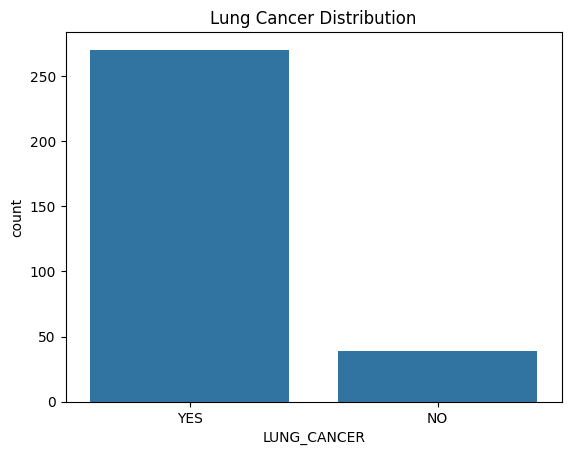

In [13]:
sns.countplot(x = 'LUNG_CANCER', data = df)
plt.title("Lung Cancer Distribution")
plt.show()

### Univariate Analysis

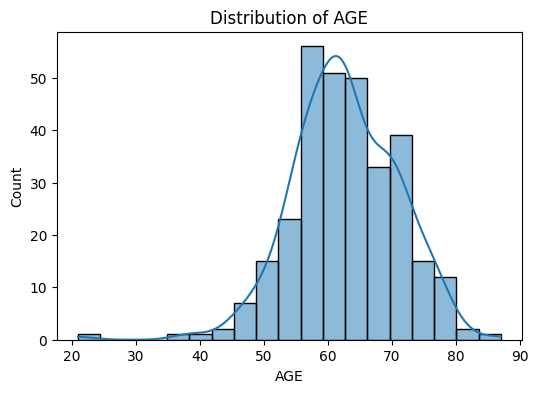

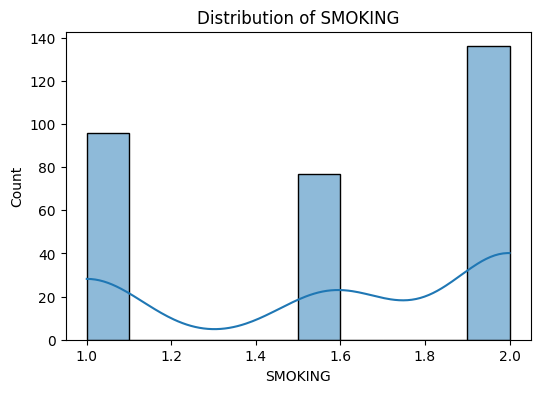

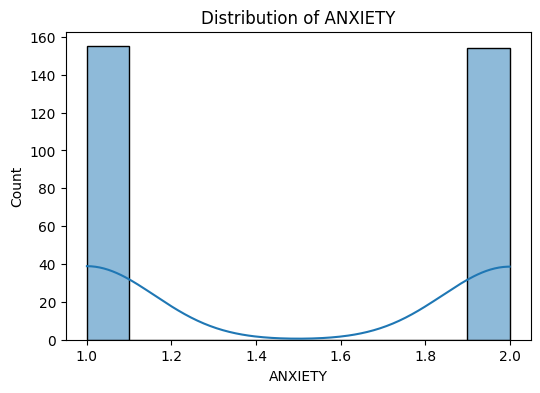

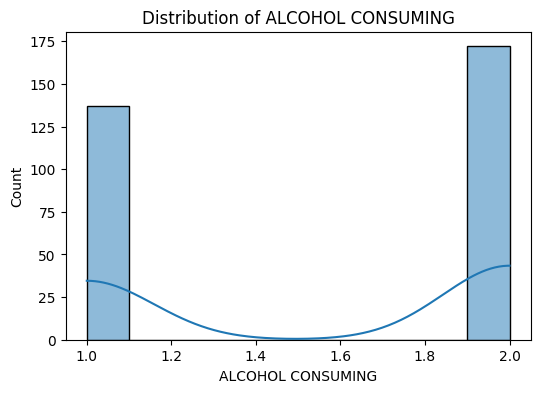

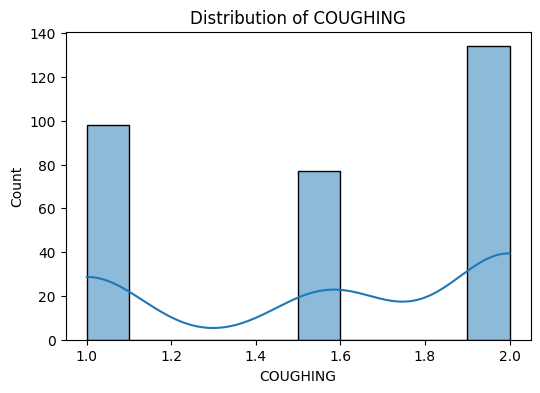

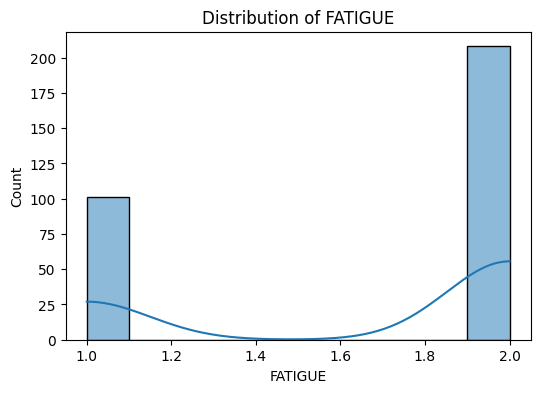

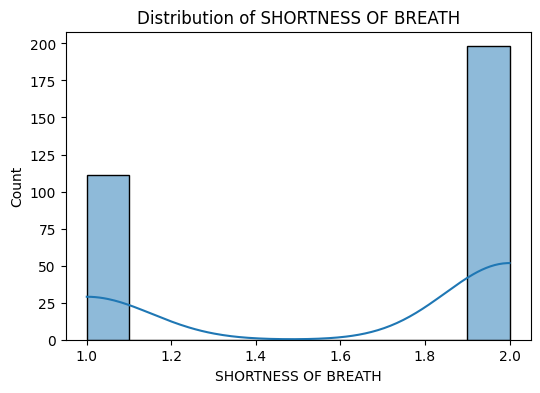

In [14]:
# Histogram
for col in ['AGE', 'SMOKING', 'ANXIETY', 'ALCOHOL CONSUMING', 'COUGHING', 'FATIGUE', 'SHORTNESS OF BREATH']:
    plt.figure(figsize = (6, 4))
    sns.histplot(x = col, data = df, kde = True)
    plt.title(f"Distribution of {col}")
    plt.show()

### Bivariate Analysis

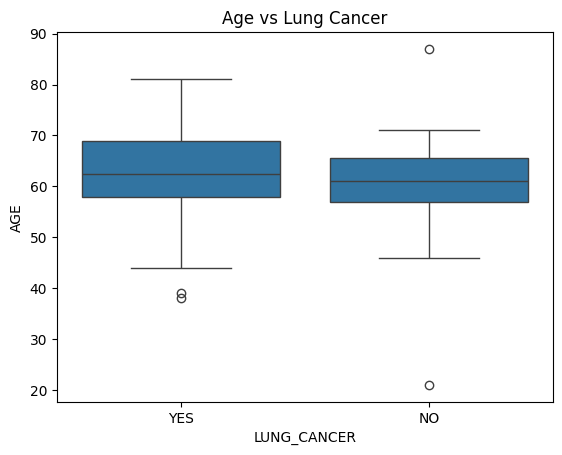

In [15]:
# boxplot
sns.boxplot(x = 'LUNG_CANCER', y = 'AGE', data = df)
plt.title('Age vs Lung Cancer')
plt.show()

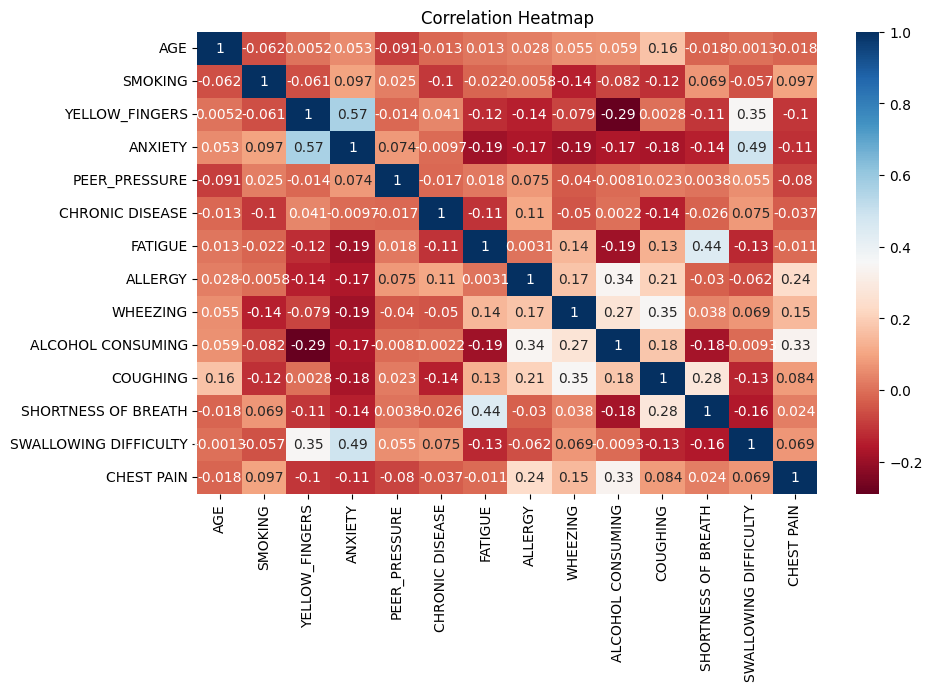

In [16]:
# HeatMap
plt.figure(figsize=(10, 6))  # Set the figure size (width=10, height=6)

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='RdBu')  
# df.corr(numeric_only=True): Calculates correlation between numeric columns only
# annot=True: Shows the correlation values in each cell
# cmap='RdBu': Sets the color map (Red-Blue diverging colormap)
# cmap -> coolwarm, viridis, plasma, inferno, magma, cividis, RdBu, bwr, seismic

plt.title('Correlation Heatmap')  # Title of the plot
plt.show()  # Displays the heatmap


#### Create the scatter plot

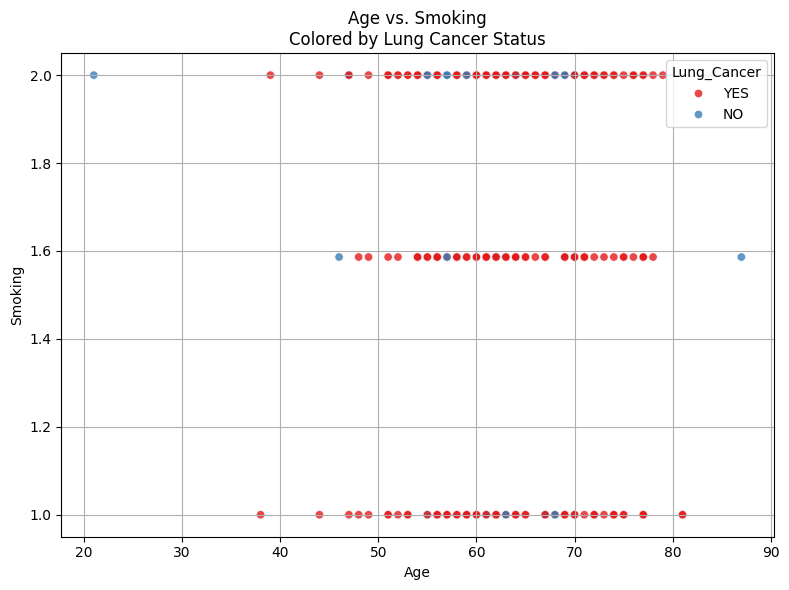

In [17]:
# Set the figure size (width=8 inches, height=6 inches)
plt.figure(figsize = (8, 6))

# Create a scatter plot with AGE on x-axis and SMOKING on y-axis
# Points are colored by LUNG_CANCER status using the 'Set1' color palette
# alpha=0.8 makes the points slightly transparent for better visibility
sns.scatterplot(
    data = df, 
    x = 'AGE', 
    y = 'SMOKING', 
    hue = 'LUNG_CANCER', 
    palette = 'Set1', 
    alpha = 0.8
)

# Set the title of the plot with a line break for clarity
plt.title("Age vs. Smoking\nColored by Lung Cancer Status")

# Label the x-axis and y-axis
plt.xlabel("Age")
plt.ylabel("Smoking")

# Show a grid for better readability
plt.grid(True)

# Add a legend with a title to explain color coding for Lung Cancer
plt.legend(title = "Lung_Cancer")

# Adjust layout to prevent overlap of elements
plt.tight_layout()

# Display the final plot
plt.show()


#### Create the stacked bar chart

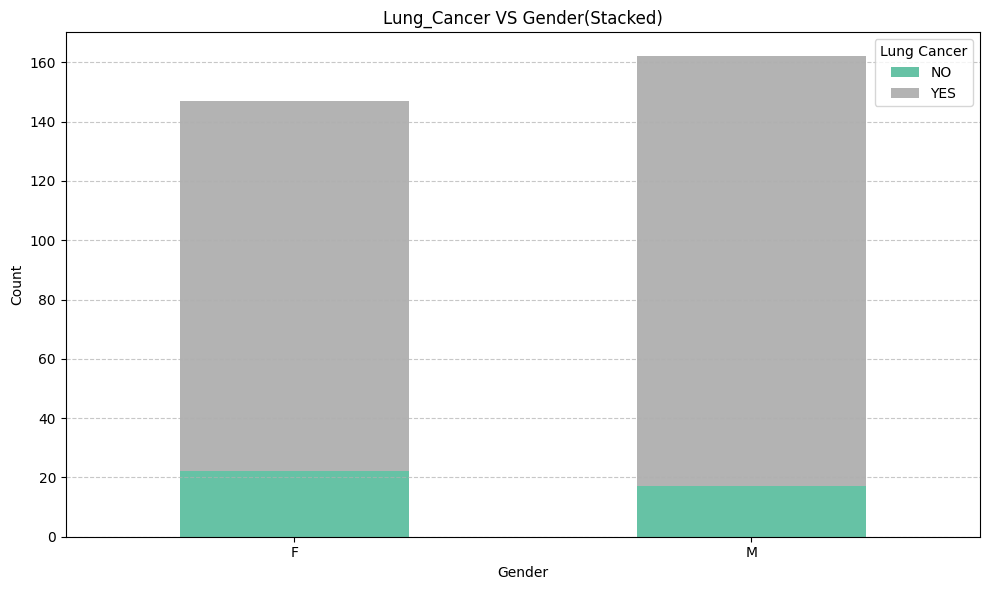

In [18]:
# Group the data by GENDER and LUNG_CANCER, then count the number of occurrences in each group
# Unstack to move 'LUNG_CANCER' from index to columns
stacked_data = df.groupby(['GENDER', 'LUNG_CANCER']).size().unstack()

# Create a stacked bar plot
# kind='bar' creates vertical bars
# stacked=True stacks 'YES' and 'NO' counts on top of each other
# figsize sets width and height of the figure
# colormap='Set2' provides distinct colors for categories
stacked_data.plot(
    kind = 'bar', 
    stacked = True, 
    figsize = (10, 6), 
    cmap = 'Set2'
)

# Set the title of the chart
plt.title("Lung_Cancer VS Gender(Stacked)")

# Label the x-axis and y-axis
plt.xlabel("Gender")
plt.ylabel("Count")

# Rotate x-axis tick labels to horizontal for better readability
plt.xticks(rotation = 0)

# Add legend with a title to explain the color-coded lung cancer categories
plt.legend(title = "Lung Cancer")

# Add horizontal gridlines with dashed style and transparency
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)

# Automatically adjust layout to prevent overlapping labels
plt.tight_layout()

# Display the final plot
plt.show()

# Modeling

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1.586207,2,2,1,1,2,1,2,2,1.577586,2,2,2,YES
1,M,74,1.586207,1,1,1,2,2,2,1,1,1.577586,2,2,2,YES
2,F,59,1.000000,1,1,2,1,2,1,2,1,2.000000,2,1,2,NO
3,M,63,2.000000,2,2,1,1,1,1,1,2,1.000000,1,2,2,NO
4,F,63,1.000000,2,1,1,1,1,1,2,1,2.000000,2,1,1,NO


## Separate Features and Target

In [21]:
X = df.drop("LUNG_CANCER", axis = 1)       # All input features
y = df['LUNG_CANCER']                      # Target variable

## Identify Column Types

In [22]:
categorical_features = ['GENDER']
numerical_features = X.drop(columns = categorical_features).columns.tolist()

## Define Preprocessing Steps

### For Numerical Columns:

In [23]:
numerical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("scaler", StandardScaler())
])

### For Categorical Columns:

In [24]:
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first"))
])

## Combine Preprocessing for All Columns

In [26]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numerical_transformer, numerical_features),
    ("cat", categorical_transformer, categorical_features)
])

## Build the Final Pipeline with Logistic Regression

In [27]:
logreg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

## Encode Target Variable

In [28]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

## Split Data into Training and Testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

## Train the Model

In [30]:
logreg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['AGE', 'SMOKING',
                                                   'YELLOW_FINGERS', 'ANXIETY',
                                                   'PEER_PRESSURE',
                                                   'CHRONIC DISEASE', 'FATIGUE',
                                                   'ALLERGY', 'WHEEZING',
                                                   'ALCOHOL CONSUMING',
                                                   'COUGHING',
                                                   'SHORTNESS OF BREATH',
                                                   'SWALLOWING DIFFICULTY',
                                                   'CHEST PAIN']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['GENDER'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

## Predict and Evaluate the Model

In [31]:
y_pred = logreg_pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.967741935483871
Confusion Matrix:
 [[ 1  1]
 [ 1 59]]
Classification Report:
               precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



## Plotting of LUNG_CANCER vs other variables

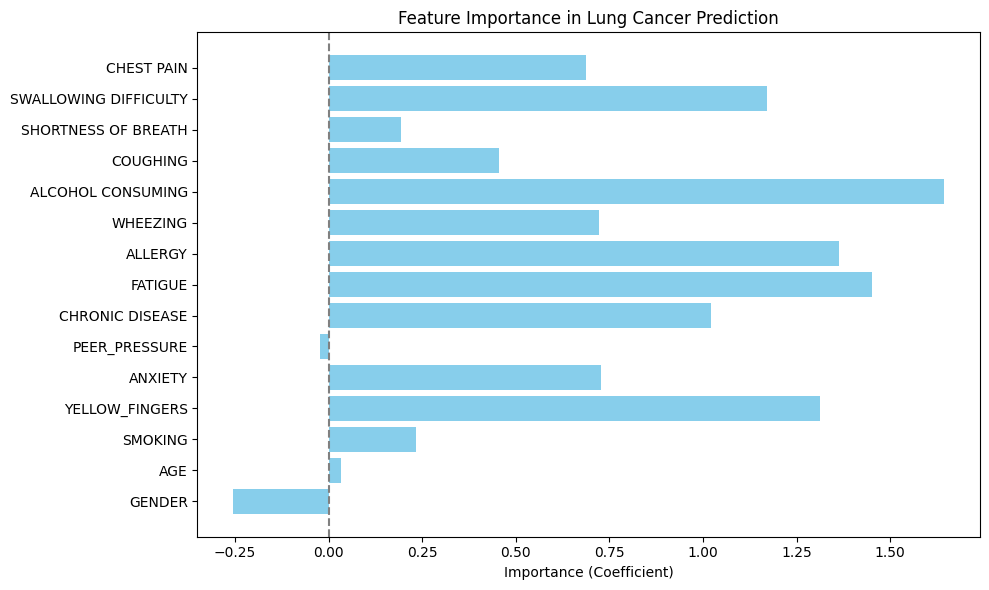

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Step 1: Load data
#df = pd.read_excel("Lung cancer data.xlsx")

# Step 2: Convert 'LUNG_CANCER' (YES/NO) to numbers
le = LabelEncoder()
df["LUNG_CANCER"] = le.fit_transform(df["LUNG_CANCER"])  # YES → 1, NO → 0

# Step 3: Convert 'GENDER' (M/F) to numbers
df["GENDER"] = LabelEncoder().fit_transform(df["GENDER"])  # M → 1, F → 0

# Step 4: Features and target
X = df.drop("LUNG_CANCER", axis=1)
y = df["LUNG_CANCER"]

# Step 5: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 7: Show feature importance (coefficients)
importances = model.coef_[0]
features = X.columns

# Step 8: Plot
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance (Coefficient)")
plt.title("Feature Importance in Lung Cancer Prediction")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()
